In [13]:
import numpy as np

- 정확도, 정밀도, 재현율은 우선순위(rank)에 대한 정확성을 판단할 수 없다. 
- 관련 컨텐츠가 얼마나 상위에 올라와있는지가 중요 지표가 될 수 있기 때문에 우선순위를 고려한 평가지표를 개발할 필요가 있다

# Mean Reciprocal Rank
- 정의
    - 가장 관련있는 컨텐츠가 얼마나 상위에 올라가 있는지를 평가한다.
    
'
    
- 수식
    - 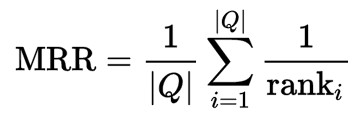
    - $|Q| $ denotes the total number of queries
    - $rank_i$ denotes the rank of the first relevant result
    - 유저별로 가장 상위에 있는 관련 콘텐츠 순위에 역수를 취한 값들에 대해 평균을 취해준다. 

'
- 예시
    - 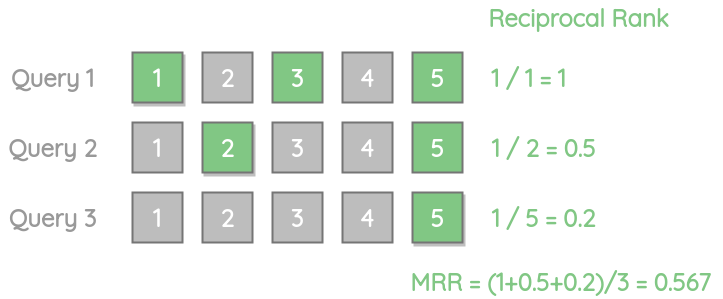
    - Query 1에서는 관련 콘텐츠가 첫번째 순위에 있다. 
    - Query 2에서 관련 콘텐츠의 최상위 순위는 두번째 순위이다.

'
- 장점
    - 최상위의 관련 콘텐츠 순위에만 집중하기 때문에 사용자에게 가장 관련있는 콘텐츠가 상위에 있는지 평가할 때 용이하게 사용된다. 
    - 새로운 콘텐츠가 아닌 이미 사용자가 알고있는 콘텐츠 중 가장 선호할만한 콘텐츠를 보여주고자 할 때 유용하다. -> 원하는 목적이 비교적 뚜렷하고 잘 알려진 콘텐츠를 알려주는 배달 어플리케이션 음식점 검색 알고리즘을 평가할 때 좋은 지표가 될 수 있다.  
    
'
- 단점
    - 최상위를 제외한 나머지 부분에 대해선 평가하지 않는다
    - 사용자가 콘텐츠에 대해 잘 알지 못해 여러번 탐색해야하는 경우 살펴봐야하는 관련 콘텐츠 개수가 1개 이상일 가능성이 높으므로, 이런 상황에서 좋은 지표로 활용되긴 힘들다

In [79]:
# relevance score
# https://gist.github.com/bwhite/3726239

rs= [[0,0,1],[0,1,0],[1,0,0]]

rs = (np.asarray(r).nonzero()[0]for r in rs) # relevant의 위치를 array형태로 반환
print(np.mean([1. / (r[0] + 1) for r in rs]))

0.611111111111111


In [46]:
np.asarray([0,0,1]).nonzero()

(array([2], dtype=int64),)

In [81]:
rs= [[0,0,1],[0,1,0],[1,0,0]]
rs = (np.asarray(r).nonzero()[0]for r in rs)
for i in rs:
    print(i)

[2]
[1]
[0]


# NDCG
- 정의
    - 더 관련있는 콘텐츠는 무엇인지에 집중하여 더 관련있는 콘텐츠를 덜 관련있는 콘텐츠보다 상위에 노출시키는지에 대해 평가한다.

'

- 계산 과정
    - 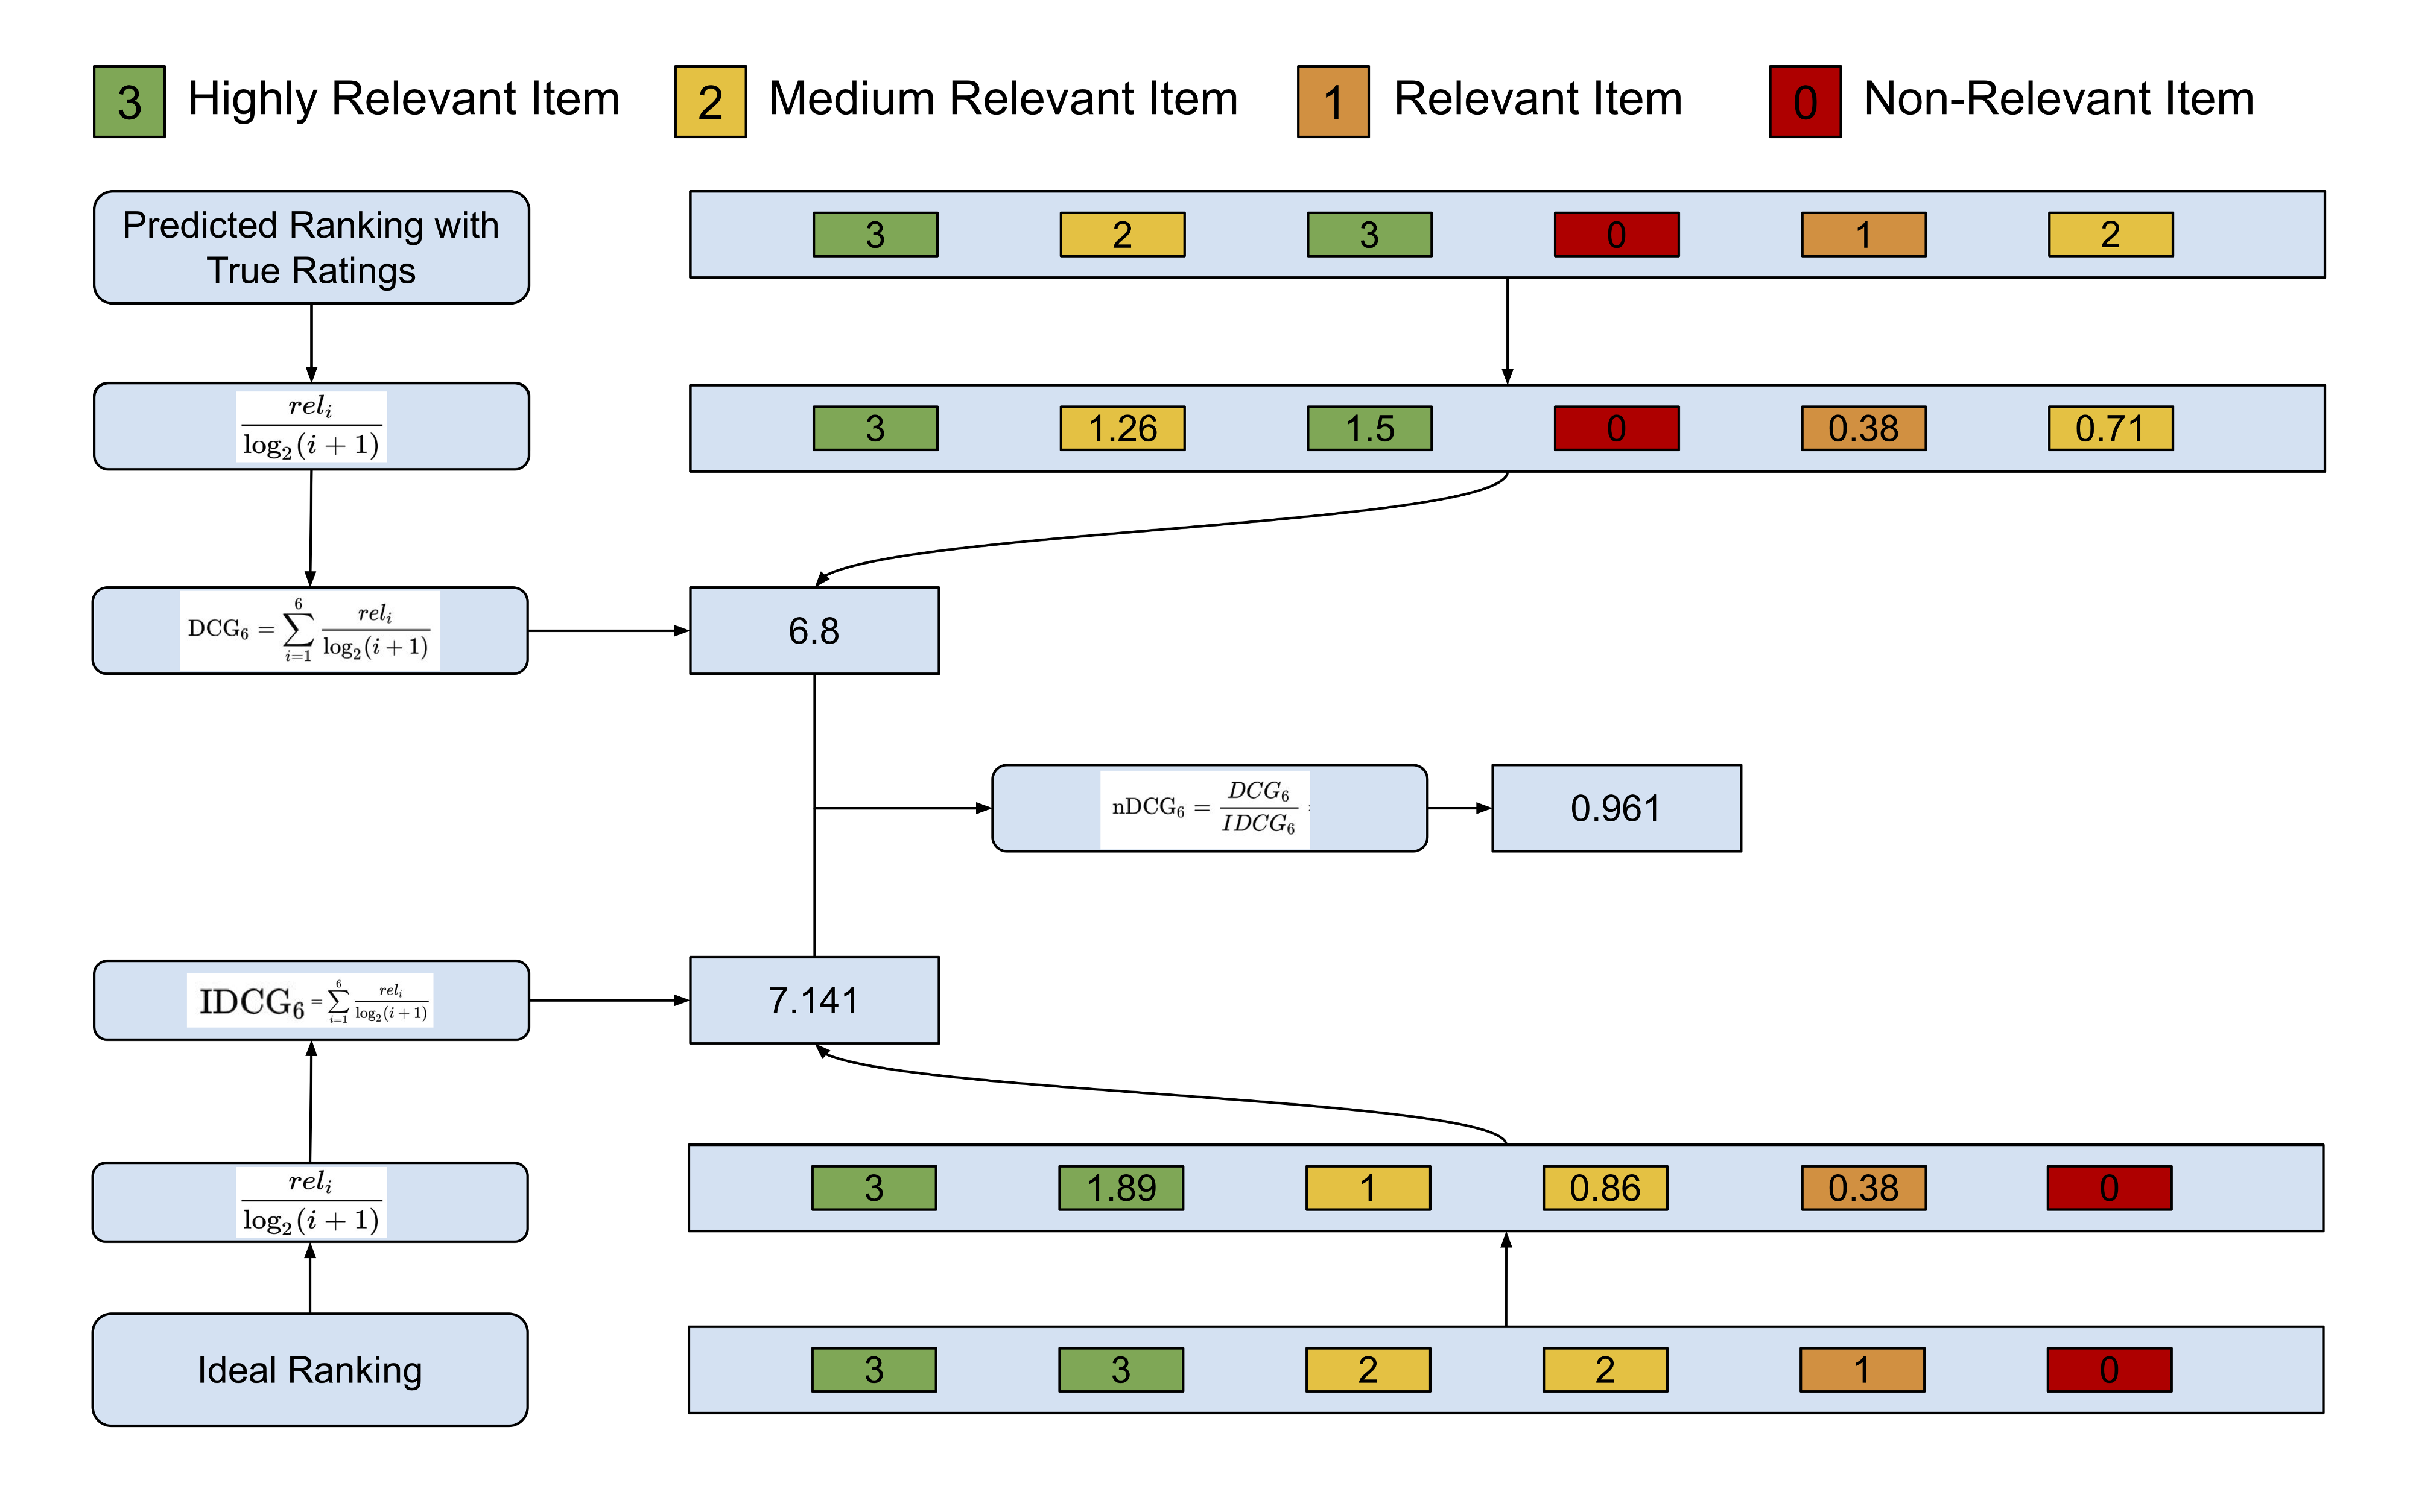
    - DCG는 각 추천 컨텐츠의 관련도를 log함수로 나누어 값을 구한다. log함수 특성상 위치 값이 클수록(하위에 있을 수록) DCG의 값을 더 작아지게 함으로써 상위 컨텐츠의 값을 점수에 더 반영할 수 있게 한다.
    - DCG 값에 관련도를 더 강조하고 싶다면, 2^관련도 - 1과 같이 관련도의 영향을 증가시킬 수 있다.
    - 사용자마다 제공되는 추천 컨텐츠의 DCG와는 별개로 IDCG(이상적인 DCG)를 미리 계산해놓는다.
    - 각 사용자의 DCG를 IDCG로 나누어서 사용자별 NDCG를 구한다.
    - 사용자별 NDCG의 평균을 구하여 해당 IR의 NDCG를 구한다.

'

- 장점
    - 다양한 관련도에 대한 평가가 가능하다
    - log함수로 하위 콘텐츠에 대한 영향을 줄일 수 있다. 

'

- 단점
    - 사용자가 콘텐츠에 대한 평점을 입력하지 않을 때 관련도를 어떻게 처리해야할지 정의하는 것이 어렵다. -> 평균값이나 0으로 처리한다면 문제가 될 수 있다고 한다. 

In [67]:
# discounted
r= [3,2,3,0,1,2]
def dcg(r,k):
    r= np.asfarray(r)[:k]
    return np.sum(r / np.log2(np.arange(2, r.size + 2)))

In [62]:
dcg(r,2)

4.2618595071429155

In [63]:
dcg(r,3)

5.7618595071429155

In [71]:
# 3개 요소까지 고려했을 때의 NDCG 계산

# IDCG
dcg_max = dcg(sorted(r, reverse=True), 3) # 가장 관련도가 높은 애가 앞에 올 때 이상적인 DCG
print(dcg_max)

5.892789260714372


In [73]:
# NDCG
dcg(r,3) / dcg_max

0.9777813616305049

# Reference
- https://lamttic.github.io/2020/03/20/01.html
- https://amitness.com/2020/08/information-retrieval-evaluation/
- https://gist.github.com/bwhite/3726239
- Naver Boostcamp AI 강의자료